### Telecom Churn Case Study

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

## Step-1: Importing and Merging the data

In [212]:
##Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [213]:
##Importing pandas and numpy
import pandas as pd
import numpy as np

In [214]:
##Importing the datasets
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [215]:
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [216]:
internet_data = pd.read_csv('internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


### Combining all the datafiles into one consolidated dataframe

In [217]:
##merging on 'customerID'
df_1 = pd.merge(churn_data,customer_data,how='inner',on='customerID')

In [218]:
df_1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [219]:
##Final dataframe with all the predictor variables
telecom = pd.merge(df_1,internet_data,how='inner',on='customerID')

### Step-2: Inspecting the dataframe

In [220]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [221]:
##shape of the dataset
telecom.shape

(7043, 21)

In [222]:
## checking out the statistic aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [223]:
##checking out the datatype
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step-3: Data Preparation

#### Converting binary variables (Yes/No) to 0/1

In [224]:
## list the variables to map
varlist=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

#Defining the map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})

##Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [225]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### For category variables with multiple levels,create dummy features(one-hot encoding)

In [226]:
# Creating a dummy variable for some of the categorical variables and dropping the first one
dummy1 = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,dummy1],axis=1)

In [227]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [228]:
## Creating dummy variables for the remaining categorical variables and dropping the level with big names

##Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#Dropping MultipleLine_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],axis=1)
#Adding the results to the main dataframe
telecom = pd.concat([telecom,ml1],axis=1)

#Creating dummy variables for the variable 'OnlineSecurity'
os = pd.get_dummies(telecom['OnlineSecurity'],prefix ='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'],axis=1)
##Adding the results to the main dataframe
telecom = pd.concat([telecom,os1],axis=1)

#Creating dummy variables for the varilabel'OnlineBackup'
ob = pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'],axis=1)
##Adding the results to main dataframe
telecom = pd.concat([telecom,ob1],axis=1)

#Creating dummy variables for the varilabel'DeviceProtection'
dp = pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],axis=1)
##Adding the results to main dataframe
telecom = pd.concat([telecom,dp1],axis=1)

#Creating dummy variables for the variable 'TechSupport'
ts = pd.get_dummies(telecom['TechSupport'],prefix ='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

#Creating dummy variables for the variable 'StreamingTV'
st = pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [229]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


#### Dropping the repeated variables

In [230]:
# We have created dummies for the below variables, so we can drop them
telecom =telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [231]:
telecom = telecom[~(telecom.TotalCharges==' ')]

In [232]:
telecom.TotalCharges = telecom.TotalCharges.astype(float,errors='ignore')

In [233]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

#### Checking for outliers

In [234]:
## Checking out outliers in the continuous variable
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [235]:
#Checking the outliers at 25%, 50%, 75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
90%,69.000000,102.645000,1.000000,5976.640000
95%,72.000000,107.422500,1.000000,6923.590000
99%,72.000000,114.734500,1.000000,8039.883000


- Here there are no outliers since the numbers are gradually increasing.

#### Checking out for missing values and inputing them 

In [236]:
## Adding up the missing values
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [237]:
## Checking out the NaN values
telecom[np.isnan(telecom['TotalCharges'])==True]

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes


### Step-4 : Train-Test Split

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
#Putting feature variable to X
X = telecom.drop(['Churn','customerID'],axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [240]:
#Putting the response variable to y
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [241]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=100)

### Step-5:Feature-Scaling

In [242]:
from sklearn.preprocessing import StandardScaler

In [243]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
4304,0.678935,1,0,-1.460670,-0.587507,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1134,-0.256000,1,0,0.596589,-0.076180,0,1,1,0,0,...,0,1,1,0,1,0,1,0,1,0
3288,-0.784442,1,0,-1.400211,-0.874558,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3632,-0.337299,1,1,0.521423,-0.138955,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
4752,-0.377949,1,0,-1.413283,-0.781850,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
#Checking out the churn Rate
(telecom['Churn'].sum()/telecom['Churn'].shape[0])*100

26.578498293515356

- We hvae almost 27% Churn Rate

### Step 6: Looking at Correlations

In [245]:
## Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

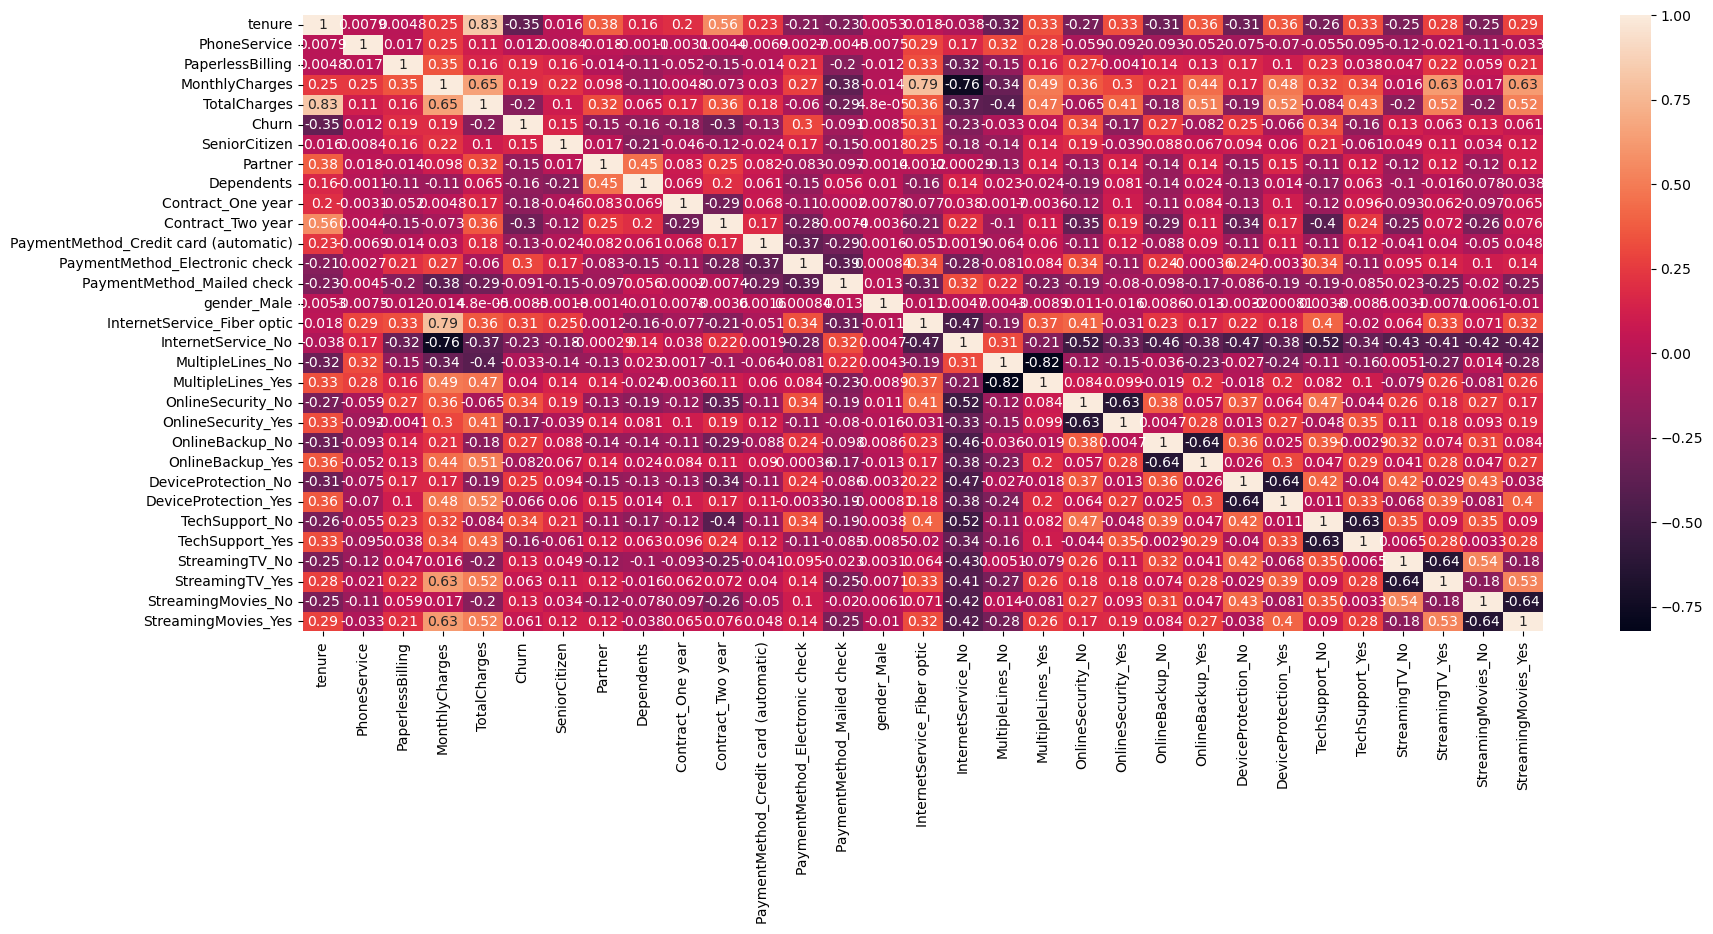

In [246]:
#Let's see the correlation matrix
plt.figure(figsize=(20,8))
sns.heatmap(telecom.corr(),annot=True)
plt.show()

### Step 7 : Model Building

In [247]:
import statsmodels.api as sm

In [248]:
#Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2109
Model:                            GLM   Df Residuals:                     2085
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -825.52
Date:                Wed, 31 Jan 2024   Deviance:                       1651.0
Time:                        13:49:45   Pearson chi2:                 2.50e+03
No. Iterations:                    12   Pseudo R-squ. (CS):             0.2864
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.9553      1.820     -0.525      0.600      -4.522       2.611
tenure                                   -1.4084      0.290     -4.850      0.000      -1.977      -0.839
PhoneService                             -0.4008      0.919     -0.436      0.663      -2.201       1.400
PaperlessBilling                          0.5403      0.142      3.792      0.000       0.261       0.820
MonthlyCharges                            0.1803      1.843      0.098      0.922      -3.431       3.792
TotalCharges                              0.6422      0.299      2.147      0.032       0.056       1.228
SeniorCitizen                             0.5150      0.158      3.254      0.001       0.205       0.825
Partner                                   0.1465      0.147      0.996      0.319      -0.142       0.435
Dependents                               -0.2134      0.168     -1.268      0.205      -0.543       0.116
Contract_One year                        -0.6094      0.201     -3.026      0.002      -1.004      -0.215
Contract_Two year                        -1.2846      0.328     -3.917      0.000      -1.927      -0.642
PaymentMethod_Credit card (automatic)    -0.0409      0.216     -0.189      0.850      -0.464       0.383
PaymentMethod_Electronic check            0.1586      0.181      0.876      0.381      -0.196       0.514
PaymentMethod_Mailed check               -0.2649      0.223     -1.189      0.234      -0.701       0.172
gender_Male                              -0.1144      0.123     -0.930      0.352      -0.355       0.127
InternetService_Fiber optic               0.5365      1.511      0.355      0.722      -2.424       3.497
InternetService_No                       -0.7757      2.043     -0.380      0.704      -4.780       3.229
MultipleLines_No                         -0.2676      0.321     -0.834      0.404      -0.896       0.361
MultipleLines_Yes                        -0.1332      0.612     -0.218      0.828      -1.333       1.066
OnlineSecurity_No                         0.2599      0.092      2.816      0.005       0.079       0.441
OnlineSecurity_Yes                       -0.4395      0.280     -1.570      0.117      -0.988       0.109
OnlineBackup_No                          -0.0634      0.084     -0.757      0.449      -0.227       0.101
OnlineBackup_Yes                         -0.1162      0.274     -0.424      0.672      -0.654       0.421
DeviceProtection_No                      -0.1213      0.086     -1.405      0.160      -0.291       0.048
DeviceProtection_Yes                     -0.0582      0.277     -0.210      0.834      -0.602       0.485
TechSupport_No                            0.1711      0.089      1.913      0.056      -0.004       0.346
TechSuppo

### Step 8 :Feature Selection using RFE

In [249]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [250]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [251]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True, False, False, False, False,  True,  True, False,
       False, False, False])

In [252]:
(len(rfe.support_))

30

In [253]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 5),
 ('Dependents', False, 4),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 10),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 7),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', False, 11),
 ('MultipleLines_No', False, 2),
 ('MultipleLines_Yes', False, 3),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_No', False, 8),
 ('OnlineBackup_Yes', False, 15),
 ('DeviceProtection_No', False, 16),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_No', False, 12),
 ('StreamingTV_Yes', False, 6),
 ('StreamingMovies_No', False, 14),
 ('StreamingMovies_Yes', Fals

In [254]:
col = X_train.columns[rfe.support_]

In [255]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PaymentMethod_Credit card (automatic)',
       'gender_Male', 'InternetService_No', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

### Assessing the model with StatsModels

In [256]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2109
Model:                            GLM   Df Residuals:                     2094
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -827.54
Date:                Wed, 31 Jan 2024   Deviance:                       1655.1
Time:                        13:49:47   Pearson chi2:                 2.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2850
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2834      0.563     -2.281      0.023      -2.386      -0.181
tenure                            -1.4000      0.288     -4.866      0.000      -1.964      -0.836
PhoneService                      -0.8057      0.285     -2.826      0.005      -1.364      -0.247
PaperlessBilling                   0.5378      0.142      3.789      0.000       0.260       0.816
MonthlyCharges                     0.4362      0.246      1.774      0.076      -0.046       0.918
TotalCharges                       0.6569      0.298      2.201      0.028       0.072       1.242
SeniorCitizen                      0.5685      0.154      3.680      0.000       0.266       0.871
Contract_One year                 -0.6408      0.199     -3.228      0.001      -1.030      -0.252
Contract_Two year                 -1.3147      0.326     -4.032      0.000      -1.954      -0.676
PaymentMethod_Electronic check     0.1846      0.147      1.258      0.208      -0.103       0.472
PaymentMethod_Mailed check        -0.2505      0.195     -1.282      0.200      -0.633       0.133
InternetService_Fiber optic        0.3469      0.277      1.253      0.210      -0.196       0.890
OnlineSecurity_No                  0.3184      0.186      1.710      0.087      -0.046       0.683
OnlineSecurity_Yes                -0.4261      0.223     -1.915      0.056      -0.862       0.010
TechSupport_No                     0.2317      0.180      1.286      0.198      -0.121       0.585
TechSupport_Yes                   -0.3394      0.227     -1.493      0.135      -0.785       0.106
==================================================================================================
"""

In [257]:
#Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4304    0.008982
1134    0.234470
3288    0.023175
3632    0.426491
4752    0.027086
5079    0.408929
4431    0.533354
2754    0.171760
2421    0.082822
6143    0.011568
dtype: float64

In [258]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00898238, 0.2344702 , 0.02317468, 0.42649063, 0.02708617,
       0.40892908, 0.53335449, 0.17175956, 0.08282214, 0.0115678 ])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [259]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.008982,4304
1,0,0.234470,1134
2,0,0.023175,3288
3,0,0.426491,3632
4,0,0.027086,4752


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [260]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.008982,4304,0
1,0,0.234470,1134,0
2,0,0.023175,3288,0
3,0,0.426491,3632,0
4,0,0.027086,4752,0


In [261]:
# Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[1452  134]
 [ 235  288]]


In [262]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8250355618776671


### Checking VIF

In [263]:
# Checking the VIF values of the feature variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [264]:
#Creating a dataframe that will contain the names of all the feature variables and their respective VIF's

In [265]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,OnlineSecurity_No,inf
12,OnlineSecurity_Yes,inf
13,TechSupport_No,inf
14,TechSupport_Yes,inf
4,TotalCharges,9.91
3,MonthlyCharges,7.06
0,tenure,7.03
1,PhoneService,6.91
10,InternetService_Fiber optic,6.16
7,Contract_Two year,3.17


#### Let's drop all the values with infinity

In [266]:
col = ['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic']

In [267]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,TotalCharges,9.56
0,tenure,6.97
1,PhoneService,6.14
3,MonthlyCharges,5.96
10,InternetService_Fiber optic,5.44
7,Contract_Two year,2.82
2,PaperlessBilling,2.53
8,PaymentMethod_Electronic check,2.07
9,PaymentMethod_Mailed check,1.89
6,Contract_One year,1.73


### Using Decision Trees

In [268]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [269]:
X_train.shape,X_test.shape

((4922, 30), (2110, 30))

In [270]:
from sklearn.tree import DecisionTreeClassifier

In [271]:
dt_base = DecisionTreeClassifier(random_state=42,max_depth=4)

In [272]:
dt_base.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [273]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [274]:
from sklearn.metrics import classification_report

In [275]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1552
           1       0.64      0.41      0.50       558

    accuracy                           0.78      2110
   macro avg       0.73      0.66      0.68      2110
weighted avg       0.77      0.78      0.76      2110



In [278]:
#Plot the ROC curve
from sklearn.metrics import roc_curve

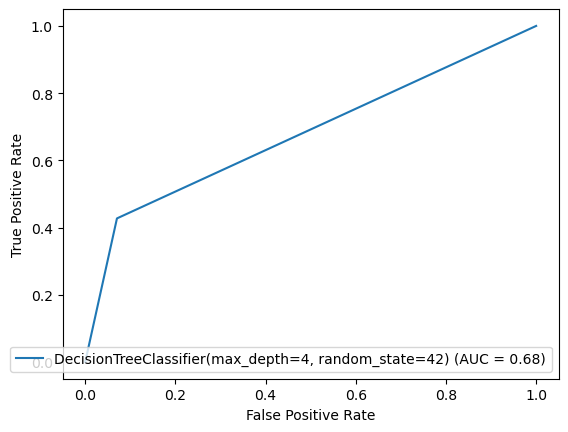

In [281]:
y_pred = dt_base.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_train, dt_base.predict(X_train))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=dt_base)
display.plot()
plt.show()

### Hyper-parameter tuning for Decision Tree

In [282]:
from sklearn.model_selection import GridSearchCV

In [283]:
dt = DecisionTreeClassifier(random_state=42)

In [284]:
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,500]
}

In [285]:
grid_search = GridSearchCV(estimator=dt,param_grid=params,n_jobs=-1,cv=4,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy')

In [287]:
dt_best = grid_search.best_estimator_
dt_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, random_state=42)

In [288]:
grid_search.best_score_

0.7933749083632184

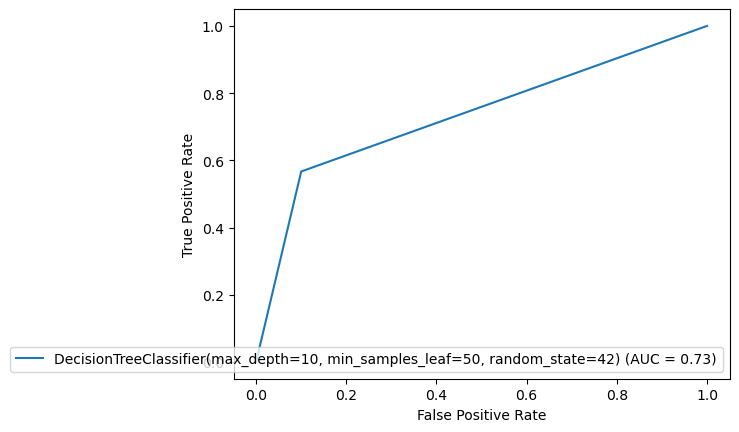

In [291]:
fpr, tpr, thresholds = roc_curve(y_train, dt_best.predict(X_train))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=dt_best)
display.plot()
plt.show()

### Using Random Forest Classifier

In [292]:
from sklearn.ensemble import RandomForestClassifier

In [297]:
rf = RandomForestClassifier(n_estimators=10,max_depth=4,max_features=5,random_state=100,oob_score=True)

In [298]:
%%time
rf.fit(X_train,y_train)

CPU times: total: 46.9 ms
Wall time: 124 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

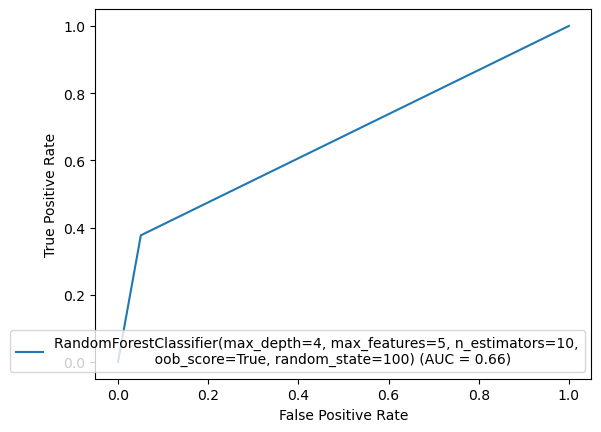

In [299]:
fpr, tpr, thresholds = roc_curve(y_train, rf.predict(X_train))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=rf)
display.plot()
plt.show()

In [302]:
##oob error
rf.oob_score_

0.7838277123120683

In [303]:
metrics.accuracy_score(y_train,rf.predict(X_train))

0.7968305566842747

### Hyper-parameter tuning for Random Forest

In [304]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [305]:
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,50,100]
}

In [307]:
grid_search = GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1,scoring ='accuracy',cv= 4)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy')

In [309]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

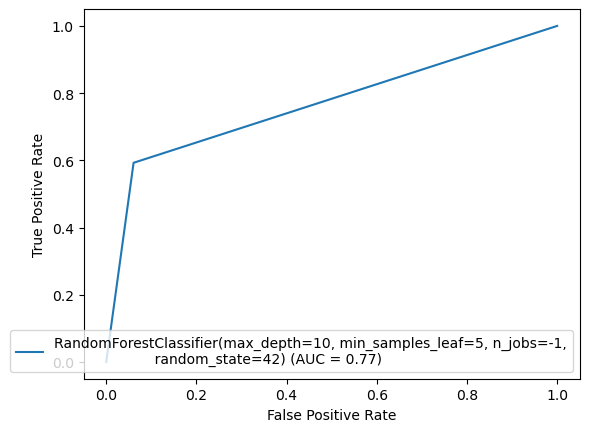

In [310]:
fpr, tpr, thresholds = roc_curve(y_train, rf_best.predict(X_train))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=rf_best)
display.plot()
plt.show()

In [311]:
## feature importances
imp = pd.DataFrame({
    'VarName':X.columns,
    'Imp': rf_best.feature_importances_
})

In [314]:
imp.sort_values(by = 'Imp',ascending=False)

,VarName,Imp
0,tenure,0.185333
4,TotalCharges,0.149404
3,MonthlyCharges,0.101330
14,InternetService_Fiber optic,0.067970
24,TechSupport_No,0.067169
18,OnlineSecurity_No,0.061507
9,Contract_Two year,0.049695
11,PaymentMethod_Electronic check,0.041201
8,Contract_One year,0.038610
20,OnlineBackup_No,0.024694
